# Урок 1. Основы обучения нейронных сетей

__Задание:__ 

Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
# Берем из методички код для двухслойной НС, убрав некоторые комментарии
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

In [2]:
# Шаг 1. Определение функций, которые понадобяться для обучения

def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
# Шаг 2. Подготовка тренировочных данных

iris_data = pd.read_csv('E:/GB/NeuralNW/Iris.csv')
print(iris_data.head())

iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy()) # в методичке необходимо отметить, что метод 'as_matrix' удален из версий 0.23.0 и выше

columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy() # в методичке необходимо отметить, что метод 'as_matrix' удален из версий 0.23.0 и выше и нужно 
                 # использовать метод 'to_numpy'
y = y.flatten()
y = to_one_hot(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [10]:
#Шаг 3. Обученние нейронной сети

w0 = 2*np.random.random((4, 5)) - 1 
w1 = 2*np.random.random((5, 3)) - 1 

n = 0.1

errors = []

for i in range(100000):

    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

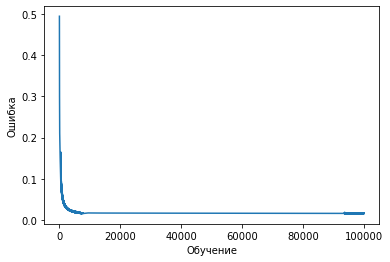

Точность нейронной сети 98.22%


In [11]:
# Шаг 4. Демонстрация полученных результатов как есть

plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

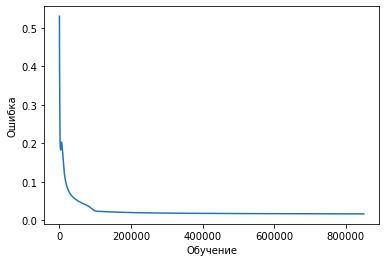

Точность нейронной сети 98.35%


In [9]:
# Подбор параметров

w0 = 2*np.random.random((4, 5)) - 1 
w1 = 2*np.random.random((5, 3)) - 1 

n = 0.005

errors = []

for i in range(850000):

    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

__Что было сделано:__

Менял скорость обучения в дипазоне 0.0001, 0.001, 0.005, 0.01<br>
Менял количество итераций от 10 000 до 1 000 000<br>
Менял количество нейронов в скрытом слое: 4, 5, 6, 10

__Выводы:__

1) Не идеально сбалансированные, но дающие результат лучше, следующие:
- скорость обучения: 0.005
- количество итераций: 850 000
- количество нейронов: 5

2) Скорость обучения, количество итераций и нейронов влияют на качество результата работы НС; при этом наблюдаются следующие закономерности:
- слишком большой параметр скорости обучения сводит с ума алгоритм градиентного спуска и тот не может найти глобальный минимум
- однако уменьшение скорости обучения требуется сбалансировать количеством итераций, иначе резальтат ухудшится
- количество нейронов оказывает незначительное влияние на конечный результат (видимо, из-за специфики алгоритма градиентного спуска)

3) Таким образом, необходимо подбирать комбинацию всех 3-х факторов для улучшения результата, хотя количество нейронов - скорее вишенка на торт, чем мощный аргумент.